# Analysis of the Graduation Rate in NYC 

### This article focuses on the Graduation Rate of NYC over the years and sheds light upon the factors affecting it.

### Github Link - 

### Author : Jeet Amit Shah

The high school graduation rate in New York State had a surprising growth last year amidst the pandemic, inching up 1.5% than 2019, according to data released by the New York State Education Department. The Graduation Rate in New York has seen a slow but steady growth year by year. Statistics suggest, Brooklyn has seen the highest graduation rate ober the years while Staten Island has the lowest rate. The special educational district, District 79, which serves high school students, young adults, and students with unique needs (e.g. incarcerated youth or adults pursuing a GED) who require alternative pathways to a quality education has the lowest rate among all the Boroughs, but has a rate growing steadily. Education is one of the most important factors in the constant growth of a country. Many factors such as Financial situation, Illnesses, feasability, etc are a few factors that affect the graduation rate in a state. Through this article we try and portray how massive an impact, a few of the above mentioned factors have on the graduation rate.

Source: https://www.wsj.com/articles/new-york-city-graduation-rate-up-amid-covid-19-pandemic-exemptions-11610653858#:~:text=The%20city's%20graduation%20rate%20hit,83.4%25%20for%20the%20previous%20class.


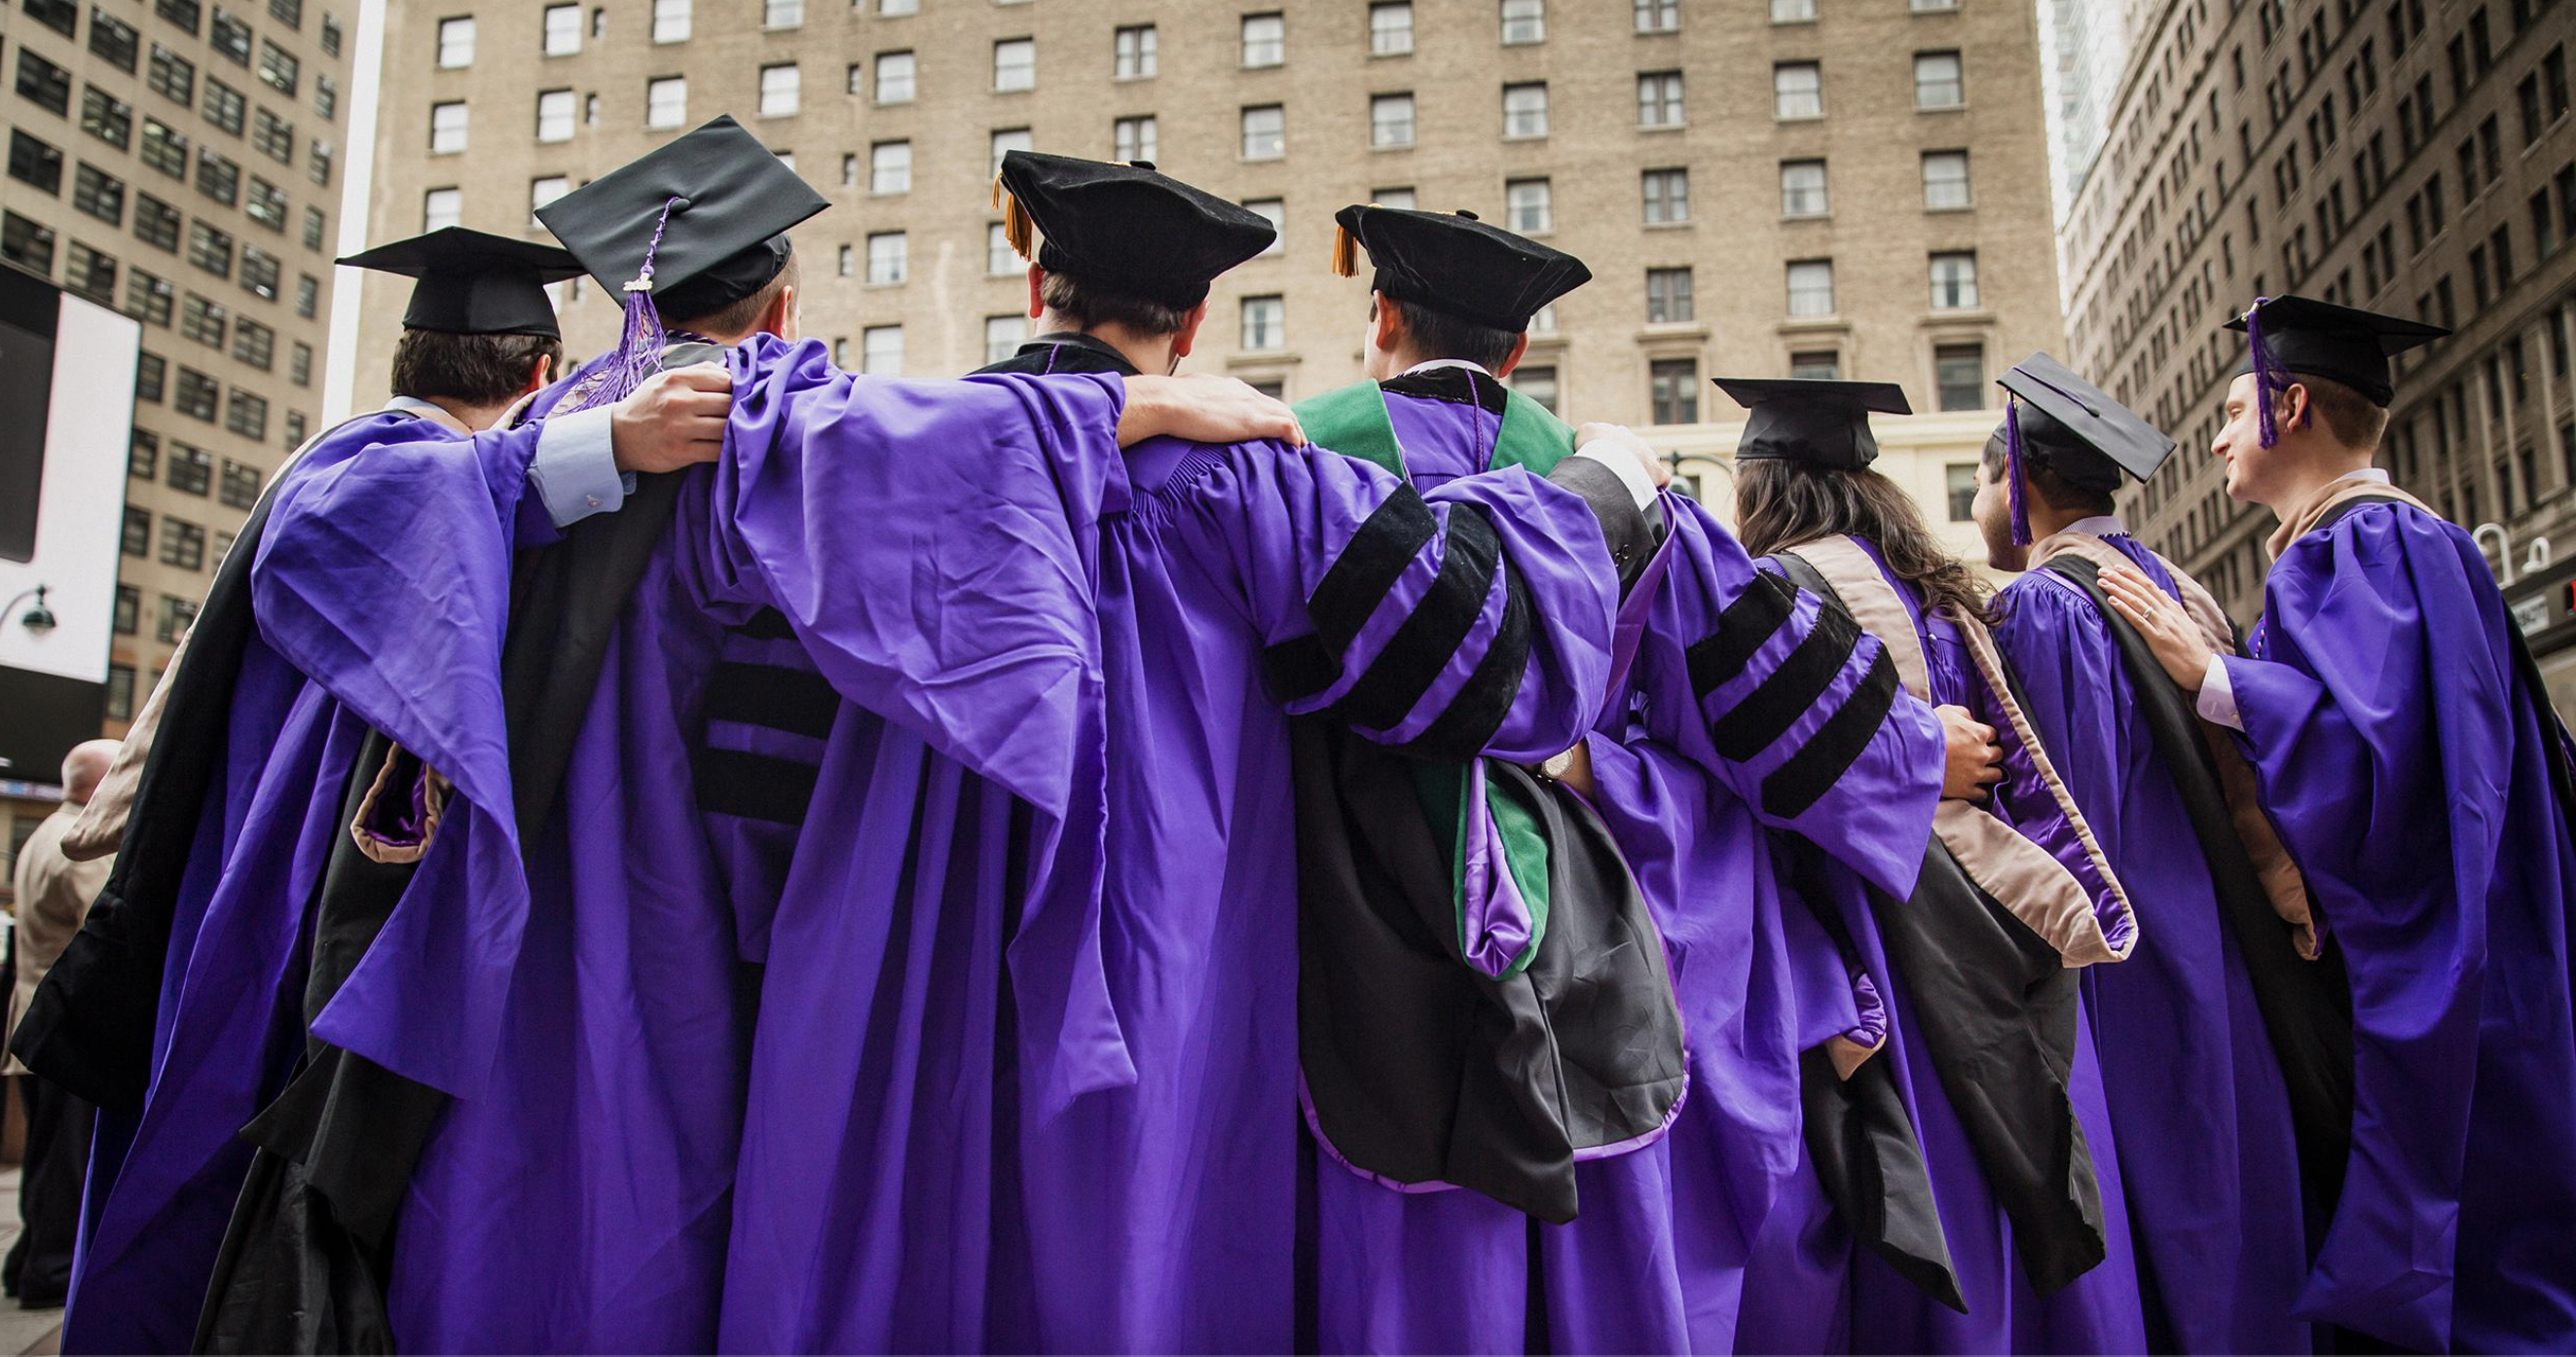

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import contextily as ctx
import ipywidgets
from ipywidgets import interactive
from ipywidgets import VBox, HBox
import bqplot.pyplot 

My dataset is named as the 2005-2015 Graduation Rates District - All of NYC.
The dataset has the details of number of Boroughs, No. of graduates, No. of Currently enrolled students, No. of dropouts. 
The dataset is of 87Kb in size and has 604 rows with 27 columns. 

In [2]:
grad = pd.read_csv('/Users/jeet/Downloads/Graduation.csv',na_values={'Total Regents % of cohort':0,'Cohort Year':0, 'Cohort #':0,'Total Grads #':0, 'Total Grads % of cohort':0, 'Total Regents % of grads':0 })

# Boroughwise Graduates & Dropouts

Here I've tried creating 2 visualizations which depict the Borough wise mean of Graduate and Currently Enrolled students. The Bar Plot below shows the average number of graduates from each borough overtime. As we can see, Brooklyn and Queens has the highest number of graduates while Staten Island and District 79 are very far behind. The Bar Plot has clear indications on both the axeses stating the names of the boroughs on 1 axis and the range of the number of students on the other axis. The Bar Plot is made by calculating the average number of graduates in each borough throughout the years and then plotting the average accordingly. 

The Line Plot below displays the average number of currently enrolled students from each borough overtime. As we can see, Brooklyn has the highest number of currently enrolled students followed by Queens. These numbers make sense as Brooklyn and Queens also has the highest number of graduates. The Line Plot is created after calculating the average number of enrolled students each year for each borough. Then, the values are plotted accordingly.

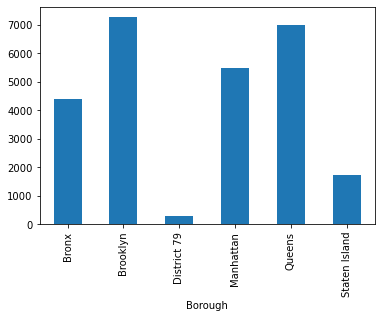

In [3]:
grad_total = grad.groupby('Borough')['Total Grads #'].mean()
grad_total.plot.bar()

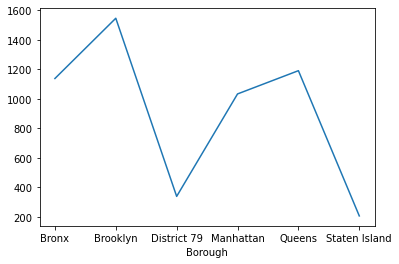

In [4]:
grad_total = grad.groupby('Borough')['Still Enrolled #'].mean()
grad_total.plot.line()

In [5]:
analysis_final = pd.pivot_table(grad, index = 'Borough', columns = 'Cohort Year', values = 'Dropout #', aggfunc = 'mean', fill_value=0)

In [6]:
x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale()

x_axs = bqplot.Axis(label='Category', scale=x_scs)
y_axs = bqplot.Axis(label='Dropout No.', scale=y_scs, 
                   orientation = 'vertical')

bar_plot = bqplot.pyplot.bar(x = [], 
                         y = [],
                         scales={'x':x_scs, 'y':y_scs})

fig_dur = bqplot.Figure(marks=[bar_plot], axes=[x_axs,y_axs], fig_margin={'top':20, 'bottom':60, 'left':40, 'right':80})

# Analysing the impact of Finances on Dropout rates

I have created a dashboard which consists of a Pivot table and a Bar Plot. The dashboard helps us understand how the dropout rates are affected by the economical condition of the borough. The dashboard helps us in proving that their is a direct correlation between the Dropout rates and the economical condition of a borough. Each cell below signifies a borough and a year. The color of the cells ranges from Red to Green. The more red a cell is the closer it is to being 0 and the more Green a cell is the closer it is to 2800 count.

The Pivot table below gives dropout number for each year in each borough. Once the user selects the Borough and the year, the dropout number for that year is broken down in terms of Economically disadvantaged and non disadvantaged students. The Bar plot below depicts the number of students from each category of the economical condition and the shows the dropout number for each of the categories. For maximum cells on the Pivot table, the Dropout students from economically disadvantaged backgrounds are more than the students dropping out from Economically non-disadvantaged backgrounds. This shows that the dropout rate is genuinely affected by the economical condition of the students.

In [7]:

# 2. scales
col_sc = bqplot.ColorScale(scheme='Red', min=np.nanmin(analysis_final.values), max=np.nanmax(analysis_final.values))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale() 

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'Cohort Year')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label = 'Borough')

# 4. Marks
heat_map = bqplot.GridHeatMap(color=analysis_final.values, 
                             row = analysis_final.index, column = analysis_final.columns, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

def barplot_fig2(x, y):
    df2 = grad[(grad['Cohort Year'] == y) & (grad['Borough'] == x)]
    df2 = df2[df2['Dropout #'] != 0]
    df2 = df2.groupby('Category')['Dropout #'].sum()
    return df2

mySelectedLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1: # only allow user to select 1 bin
        i,j = change['owner'].selected[0]
        v = analysis_final.values[i,j] # data value in that bin
        mySelectedLabel.value = 'Mean dropouts for borough: ' + str(analysis_final.index[i]) + ', in the year ' + str(analysis_final.columns[j]) + ' are = ' + str(v)
        analysis_final2 = barplot_fig2(analysis_final.index[i], analysis_final.columns[j])
        bar_plot.x = analysis_final2.index
        bar_plot.y = analysis_final2.values
heat_map.observe(on_selected, 'selected')

# 6. figure!
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax], fig_margin={'top':30, 'bottom':60, 'left':80, 'right':100})


# myDashboard = ipywidgets.VBox([fig, fig_dur])
# myDashboard

myDashboard = ipywidgets.VBox([mySelectedLabel, fig, fig_dur])
myDashboard

# myDashboard = ipywidgets.VBox([fig, fig_dur])
# myDashboard

### In the end I would like to conclude by saying that the graduation rate of a state is affected by a lot of factors. One such impactful factor, Economical condition, was proven to be directly correlated with the graduation Rate in this article. 